<a href="https://www.kaggle.com/code/sakalaharshith/heart-disease-prediction-eda-modelselection?scriptVersionId=116723307" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,recall_score,precision_score,f1_score
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.svm import SVC
import os


 

In [2]:
data=pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [3]:
data.describe()
# This clearly shows different features have different range of values so it is better if we normalise the data 
# but before normalising the data it is better to check for outliers. 

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [4]:
data.describe(include='O')
# Since these are all object data types.So, it is required to object encoding we can choose either label encoder or one hot encoder
# But since there are less than 5 different categories in each column i am going with label encoder.

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [5]:
data.isnull().sum()
# It is clear that there are no null values we dont have to perform any data manipulation or dropping columns etc...

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
np.unique(data['HeartDisease'], return_counts=True)
# The class distribution is almost balanced in Heart Disease feature.


(array([0, 1]), array([410, 508]))

<AxesSubplot:xlabel='Sex', ylabel='count'>

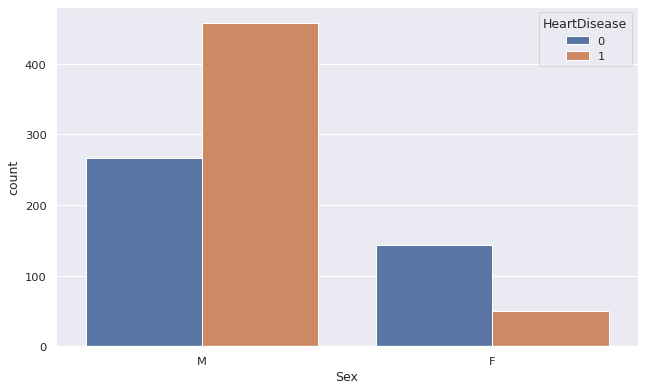

In [7]:
sns.set(style="darkgrid")

plt.figure(figsize=(10,6),dpi=75)
sns.countplot(x='Sex',data=data,hue='HeartDisease')
# Two observations are clear from this graph,they are:
# It is clearly visible that the data distribution among male and female is clearly imbalanced.
# But it can also be said that males are tend to be more proned to heart disease than female.this feature can make a good impact on model decision

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

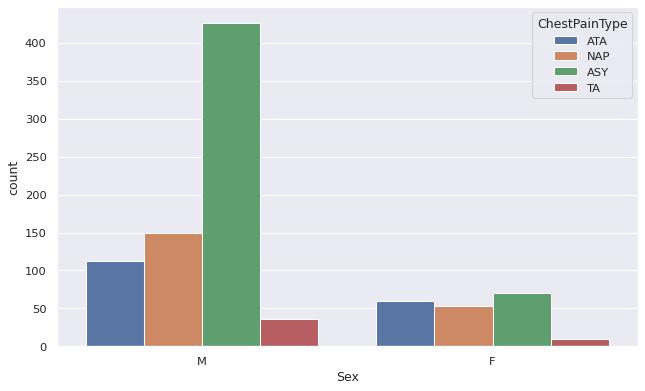

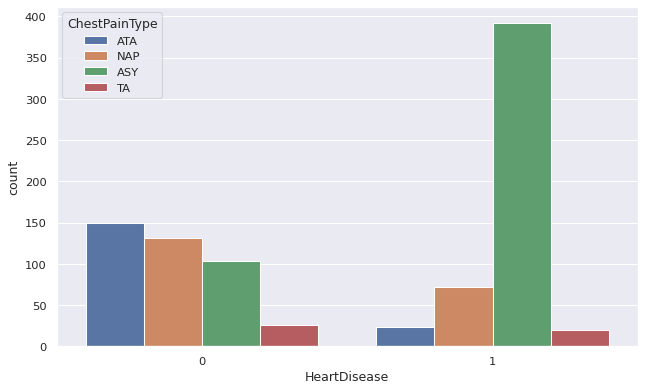

In [8]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,6),dpi=75)
sns.countplot(x='Sex',data=data,hue='ChestPainType')

sns.set(style="darkgrid")
plt.figure(figsize=(10,6),dpi=75)
sns.countplot(x='HeartDisease',data=data,hue='ChestPainType')
# From the following two diagrams it is clear that mostly chestpain of type ASY is observed in people who has heart disease
# or it can also be inferred that ASY chestpain type is  observed as an important symptom that warns a patient to get tested for checking the presence of any heart disease.


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

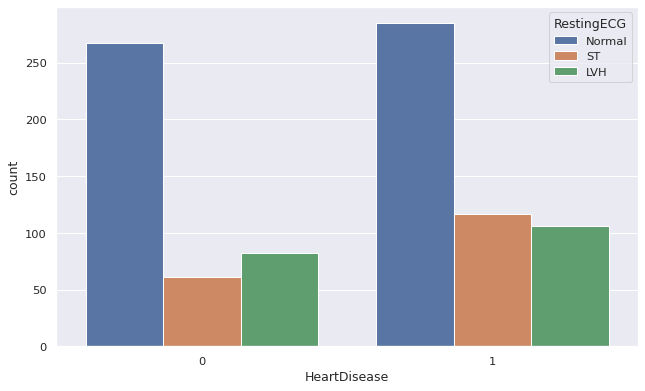

In [9]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,6),dpi=75)
sns.countplot(x='HeartDisease',data=data,hue='RestingECG')
# This feature seems to be not impactful in predicting heart disease output as there are no siginificant different changes between two output categories but it can be confirmed by calculating correlation.

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

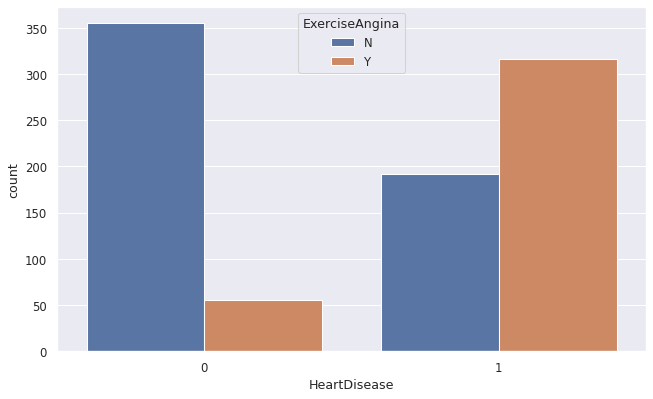

In [10]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,6),dpi=76)
sns.countplot(x='HeartDisease',data=data,hue='ExerciseAngina')
# It is clearly visible that exercise-angina is more observed in patients suffering from heart disease that means exercise angina is one of the main factors that caused a heart disease to people in this data.So it is important to include this in prediction.

'\n1)It is clearly observed that with age is somehow directly related to more chances of getting heart diseases. It is also observed that with high cholestrol and age range between 30-50 are more prone to getting heart diseases.\n2)It is also observed that there is an opposite or negative correlation between MaxHr and Heart disease as well with age.\n3)It is observed that there might not be a good correlation between RestingBP and HeartDisease.\n4)It seems like there is no good correlation observed between oldpeak and age but it shows good correlation with heart disease.'

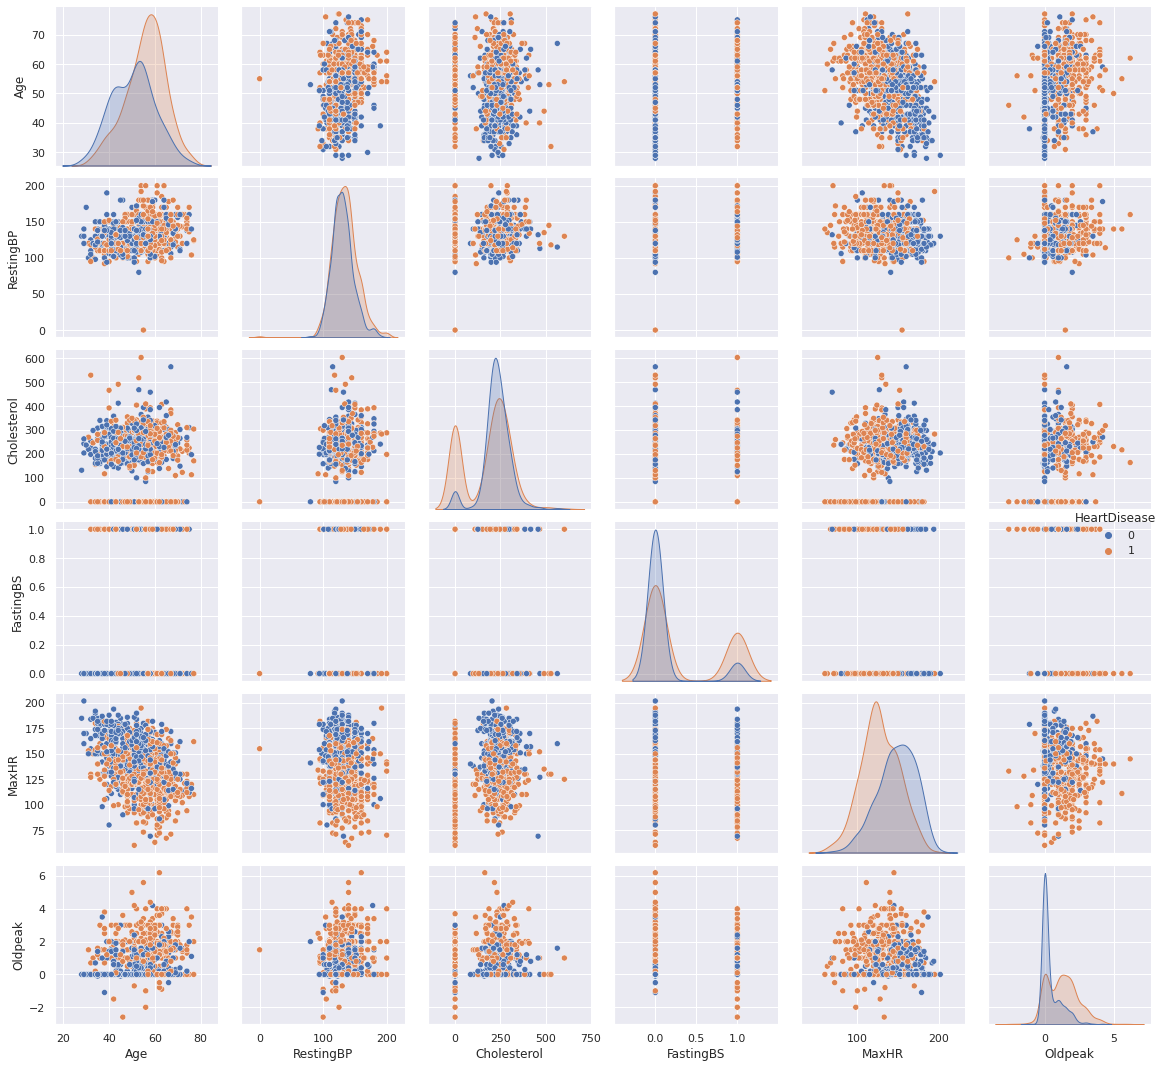

In [11]:
sns.pairplot(data,hue='HeartDisease')
plt.tight_layout()
plt.plot()
#Observations:
"""
1)It is clearly observed that with age is somehow directly related to more chances of getting heart diseases. It is also observed that with high cholestrol and age range between 30-50 are more prone to getting heart diseases.
2)It is also observed that there is an opposite or negative correlation between MaxHr and Heart disease as well with age.
3)It is observed that there might not be a good correlation between RestingBP and HeartDisease.
4)It seems like there is no good correlation observed between oldpeak and age but it shows good correlation with heart disease."""



<AxesSubplot:>

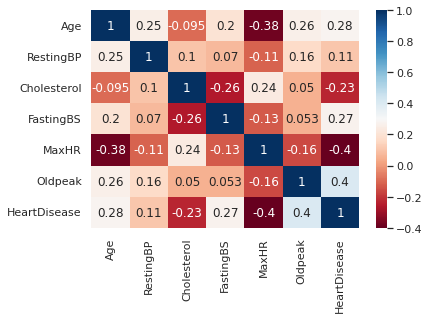

In [12]:
sns.heatmap(data.corr(), annot= True, cmap = 'RdBu')

In [13]:
Encoding_features=data.select_dtypes(include='O').columns.tolist()
print(Encoding_features)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [14]:
numeric_features=data.select_dtypes(include=np.number).columns.to_list()
print(numeric_features)

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


In [15]:
features = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS','RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
target = 'HeartDisease'
X=data[features]
Y=data[target]
label_encoder=LabelEncoder()
X=X.apply(label_encoder.fit_transform)
X_copy=X.copy()
len(features)



11

In [16]:
fig=px.box(data,y="Cholesterol",x='HeartDisease',title='Cholestrol distribution',color="Sex")
fig.show()
#It seems to not have too many outliers considering this column alone the outliers can be removed but we also need inspect other features to conclude about outliers.
# It is clear from the observation that alone cholestrol doesnot possess any correlation.On the contrary, if we combine age and cholestrol it smay seems to be a good predictor.


In [17]:
fig = px.box(data,y="Oldpeak",x="HeartDisease",title="Oldpeak Distribution",color='Sex')
fig.show()

In [18]:
fig = px.box(data,y="MaxHR",x="HeartDisease",title="MaxHR distribution",color='Sex')
fig.show()

In [19]:
fig=px.box(data,y="Age",x="HeartDisease",title="Age Distribution",color="Sex")
fig.show()

In [20]:
fig=px.box(data,y="RestingBP",x="HeartDisease",title="RestingBP Distribution",color="Sex")
fig.show()

In [21]:
"""Outliers are basically condition or situation based problem in accordance to this context we dont have any evidence to say that outliers are present because of error measurements.So it is better we include outliers and most cases outliers are not removed as it leads to poor model training."""

'Outliers are basically condition or situation based problem in accordance to this context we dont have any evidence to say that outliers are present because of error measurements.So it is better we include outliers and most cases outliers are not removed as it leads to poor model training.'

In [22]:
#Feature Selection
"""
Possible important features:
Age,Sex,ChestPainType,MaxHR,Cholestrol,Exercise Anigna
Note: The features are not arranged in order of importance they are just listed as possible important features.
"""
#Here we are proceeding with feature selection using univariate feature analysis using chisquare method and selectkbest from sklearn

'\nPossible important features:\nAge,Sex,ChestPainType,MaxHR,Cholestrol,Exercise Anigna\nNote: The features are not arranged in order of importance they are just listed as possible important features.\n'

In [23]:
#Here we are going to use standardisation to scale numerical features as it is clear that we cannot use normalisation as we have outliers present in numerical data and we know that normalisation try to squeze outliers values in range of 0 to 1 which actually trying to squeeze class distribution resulting in changing variance of that particular class.
scaling=StandardScaler()
X['Oldpeak']=scaling.fit_transform(X[['Oldpeak']])
X['Cholesterol']=scaling.fit_transform(X[['Cholesterol']])
X['MaxHR']=scaling.fit_transform(X[['MaxHR']])
X['Age']=scaling.fit_transform(X[['Age']])
X['RestingBP']=scaling.fit_transform(X[['RestingBP']])

print(X.head())

        Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0 -1.433140    1              1   0.574853     1.113245          0   
1 -0.478484    0              2   1.568401    -0.709248          0   
2 -1.751359    1              1  -0.134823     1.011049          0   
3 -0.584556    0              0   0.432918    -0.164204          0   
4  0.051881    1              2   1.142595    -0.487824          0   

   RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  
0           1  1.406111               0 -0.872463         2  
1           1  0.763697               0  0.120373         1  
2           2 -1.524902               0 -0.872463         2  
3           1 -1.163544               1  0.616791         1  
4           1 -0.601432               0 -0.872463         2  


In [24]:
KBest= SelectKBest(mutual_info_classif, k=7)
X_new=KBest.fit_transform(X, Y)
cols = KBest.get_support(indices=True)
selected_columns = X.iloc[:,cols].columns.tolist()
selected_columns
# Since we know that the output of the data is of categorical in nature and the best options we have to perform feature selection is to either go for chi2 or mutual information.
# Since we clearly know that we cant deal with chi2 when we have negative valued input features and also it is more suitlable for categorical features.
# whereas Mutual information can be used with negative numbers and also said that it is said it can prett much deal properly with both categorical and numerical input features.
# So,because of these reasons i have gone with mutual information feature selection technique. 


['Sex',
 'ChestPainType',
 'Cholesterol',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope']

In [25]:
main_data=[X,Y]
main_data=pd.concat(main_data,axis=1)
print(main_data.iloc[913:920,])



          Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
913 -0.902775    1              3  -1.341273     0.687429          0   
914  1.536902    1              0   0.858724    -0.521889          1   
915  0.370100    1              0  -0.134823    -1.237260          0   
916  0.370100    0              1  -0.134823     0.210515          0   
917 -1.645286    1              2   0.432918    -0.794411          0   

     RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
913           1 -0.199923               0  0.318940         1             1  
914           1  0.161434               0  2.304612         1             1  
915           1 -0.882488               1  0.318940         1             1  
916           0  1.486413               0 -0.872463         1             1  
917           1  1.446262               0 -0.872463         2             0  


<AxesSubplot:>

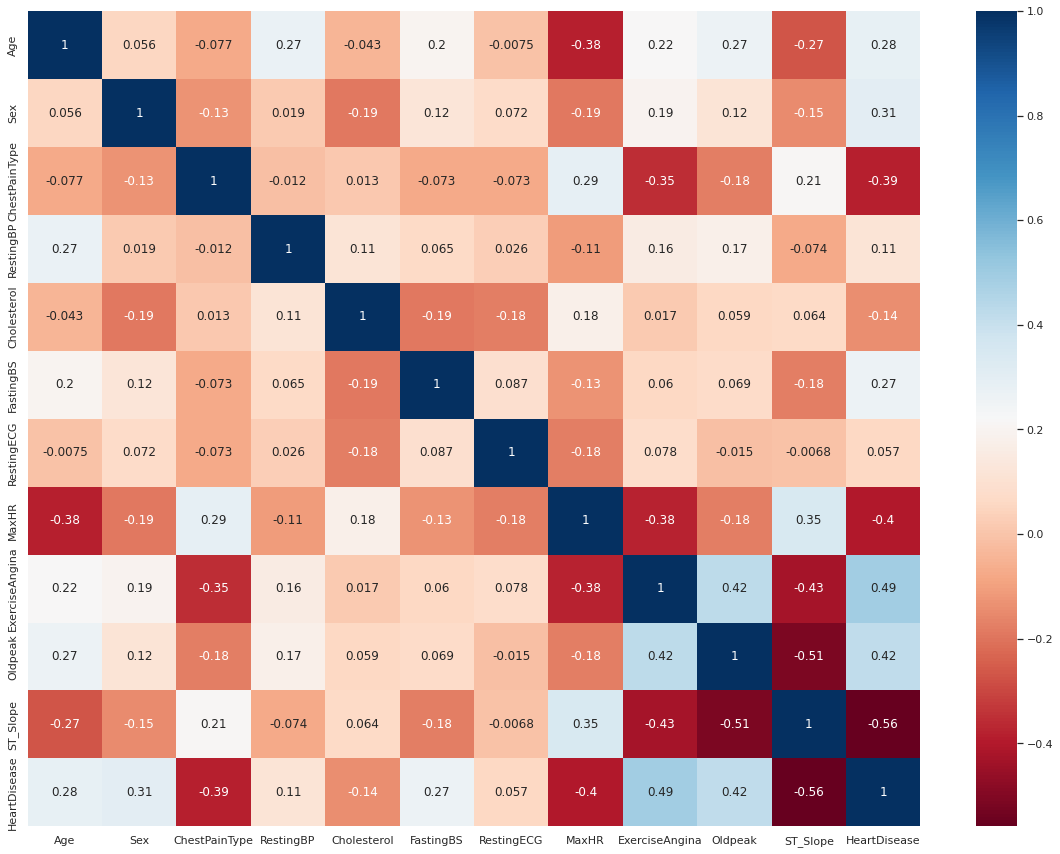

In [26]:
plt.subplots(figsize=(20,15))
sns.heatmap(main_data.corr(), annot= True, cmap = 'RdBu')
# ChestPain,Cholestrol,MaxHR,ExerciseAnigna,OldPeak,ST_Slope,Sex,FastingBS

In [27]:
"""It is clearly visible that whatever features that we mention before feature selection as possible main features those features are present in feature selection output."""

'It is clearly visible that whatever features that we mention before feature selection as possible main features those features are present in feature selection output.'

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
X[selected_columns], Y, test_size=0.10)


model accuracy is 0.8260869565217391
cross validation accuracies [0.79347826 0.88043478 0.83695652 0.86956522 0.86956522 0.80434783
 0.86956522 0.79347826 0.74725275 0.78021978]
mean accuracy of the model 0.8244863831820354
standard deviation of the model accuracy is 0.04431158660246356


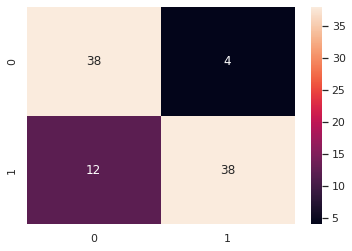

Recall score of the model 0.76
Precision score of the model  0.9047619047619048
F1 Score of the model 0.8260869565217391


In [29]:
clf = LogisticRegression(random_state=0,C=10,penalty="l2").fit(X_train, y_train)
output=clf.predict(X_test)
print("model accuracy is",accuracy_score(y_test,output))
scores = cross_val_score(clf, X,Y , cv=10)
print("cross validation accuracies",scores)
print("mean accuracy of the model",scores.mean())
print("standard deviation of the model accuracy is",scores.std())
cm=confusion_matrix(y_test,output)
#display=ConfusionMatrixDisplay(cm)
#display.plot()
#plt.show()

sns.heatmap(cm,annot=True)
plt.show()
#y_test.count()
print("Recall score of the model",recall_score(y_test,output))
print("Precision score of the model ",precision_score(y_test,output))
print("F1 Score of the model",f1_score(y_test,output))
# Since we all know that it is important to calculate both sensitivity and precision to see how well the model is able to detect positive cases and how confident is it about his prediction
# From the model it is clear that model sensitivity is not that good as we need it more than 95% but precision is good as the model is 93% confident that its predictions are correct or accurate.
# Since we also know that sensitivity is partially inversely proportional to precision. So here our main goal is to try to increase both parameters as much as we can so that the model is balanced.
# As we all know that F1_score basically tells you about the balance of the model the number is fine but we try to improve it by implementing other models such as decision trees, random forests etc...

0.8985507246376812
cross_validation_scores of decision trees [0.82608696 0.92391304 0.79347826 0.90217391 0.84782609 0.83695652
 0.85869565 0.76086957 0.74725275 0.67032967]
mean of cross validation scores 0.8167582417582417
standard deviation of cross validation scores 0.07206579163268557
<class 'numpy.ndarray'>


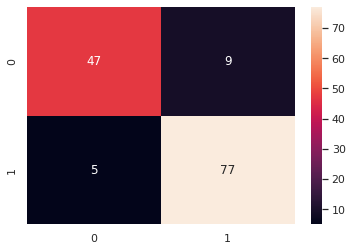

recall of the model 0.9390243902439024
precision score of the model 0.8953488372093024
F1-score of the model 0.9166666666666666


'\n1) It seems that decision tree model is almost having the same accuracy as logistic regression but detection of disease is bit better in logistic regression \n2) But Decision trees has little better precision than the previous model as it indicates that this model is more confident of its heart disease prediction than logistic regression. \n3) But after finding out F1-score of both models it is clear both models performance are similar and good.\n'

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
X_copy[selected_columns], Y, test_size=0.15)
clf=DecisionTreeClassifier(random_state=500,max_depth=4)

clf.fit(X_train,y_train)
output=clf.predict(X_test)
print(accuracy_score(y_test,output))
scores = cross_val_score(clf, X,Y , cv=10)
print("cross_validation_scores of decision trees",scores)
print("mean of cross validation scores",scores.mean())
print("standard deviation of cross validation scores",scores.std())
print(type(scores))
cm=confusion_matrix(y_test,output)
sns.heatmap(cm,annot=True)
plt.show()
print("recall of the model",recall_score(y_test,output))
print("precision score of the model",precision_score(y_test,output))
print("F1-score of the model",f1_score(y_test,output))

# Observations
"""
1) It seems that decision tree model is almost having the same accuracy as logistic regression but detection of disease is bit better in logistic regression 
2) But Decision trees has little better precision than the previous model as it indicates that this model is more confident of its heart disease prediction than logistic regression. 
3) But after finding out F1-score of both models it is clear both models performance are similar and good.
"""

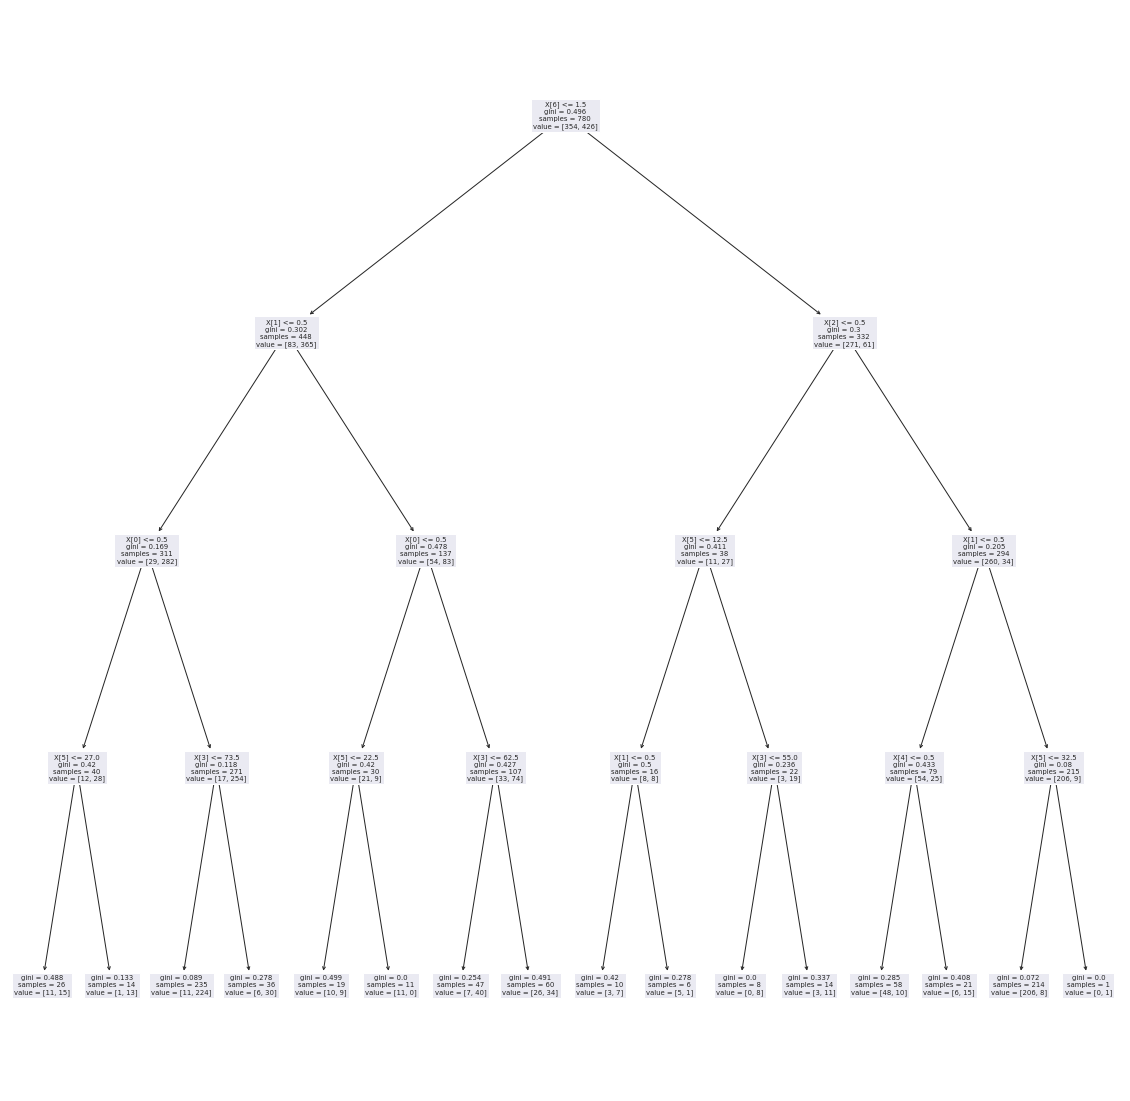

In [31]:
plt.subplots(figsize=(20,20))
tree.plot_tree(clf)
plt.show()

0.8260869565217391
cross_validation_scores of decision trees [0.83695652 0.83695652 0.88043478 0.90217391 0.85869565 0.80434783
 0.85869565 0.7826087  0.71428571 0.81318681]
mean of cross validation scores 0.8288342092689918
standard deviation of cross validation scores 0.05104827769938088
<class 'numpy.ndarray'>


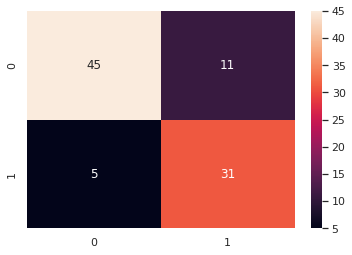

recall of the model 0.8611111111111112
precision score of the model 0.7380952380952381
F1-score of the model 0.7948717948717949


In [32]:
X_train, X_test, y_train, y_test = train_test_split(
X[selected_columns], Y, test_size=0.10)

clf=SVC(kernel='rbf',C=0.1)
clf.fit(X_train,y_train)
output=clf.predict(X_test)
print(accuracy_score(y_test,output))
scores = cross_val_score(clf, X,Y , cv=10)
print("cross_validation_scores of decision trees",scores)
print("mean of cross validation scores",scores.mean())
print("standard deviation of cross validation scores",scores.std())
print(type(scores))
cm=confusion_matrix(y_test,output)
sns.heatmap(cm,annot=True)
plt.show()
print("recall of the model",recall_score(y_test,output))
print("precision score of the model",precision_score(y_test,output))
print("F1-score of the model",f1_score(y_test,output))

In [33]:
# Conclusion:
# 1)Since it is very important to decide which metric has to be given more preference apart from the model accuracy. Since, we all know that while coming to disease prediction or detection it is important that we give a bit more importance to recall than precision.
# 2)But it doesnt mean that  precision is not useful we also need a very good precision score as it tells you the confidence of the model regarding its heart disease detection and most importantly these two parameters(precision and recall) should be good and balanced at the same time.
# 3) Since from the results, it can be concluded that SVM seems to have performed better than other in all metrics.